# Sklearn Lab 

We learned in class that the XOR problem can't be solved using a single perceptron and
requires a neural network to solve. In this part, you have to create the best possible neural net i.e.
the one with the minimum number of layers and fewest number of parameters that will solve the
XOR problem.
Give the weights and intercepts for each neuron and any other parameters that you have used.

In [9]:
from sklearn.neural_network import MLPClassifier

In [10]:
x = [[0.,0.],[1.,0.],[0.,1.],[1.,1.]]

In [11]:
y = [0.,1.,1.,0.]

Using a single hidden layer with two neurons and minimum parameters.

In [15]:
clf = MLPClassifier(hidden_layer_sizes=(2),solver ='lbfgs',random_state= 6, learning_rate='adaptive')

In [16]:
clf.fit(x,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=2, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=6, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [17]:
clf.predict(x)

array([0., 1., 1., 0.])

In this part, you will create a neural net for a dataset chosen from the UCI ML repository. The
repository is available at:
http://archive.ics.uci.edu/ml/datasets.html
You will first have to read in the dataset using Pandas into a dataframe. The second step will
involve pre-processing the dataset - analyze each of the attributes and scale them. Then you will
randomly split the data into train and test parts – you are free to decide the split size. Next will be
the model creation step – you will need to tune as many parameters as possible. Finally, evaluate
the performance of the model using the best set of parameters

Using the wine dataset available on UCI ML repository.
Using the sklearn library to use the dataset to load the dataset.

In [214]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# Step 1 : Read in the dataset using Pandas into a dataframe.

In [95]:
wine = load_wine()
wine_df = pd.DataFrame(np.c_[wine['data'],wine['target']],columns = wine['feature_names']+['Class'])

In [96]:
class_dict = {0.0 : 'class_0',1.0 : 'class_1',2.0:'class_2'}

In [97]:
wine_df['Class'] = wine_df['Class'].map(class_dict)

In [98]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


# Step 2: Analyze each of the attributes and scale them.

In [99]:
wine_df.shape

(178, 14)

In [100]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FC05D536A0>,
      dtype=object)

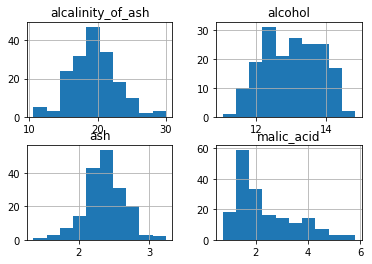

In [38]:
wine_df.iloc[:,0:4].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FC0624B208>,
      dtype=object)

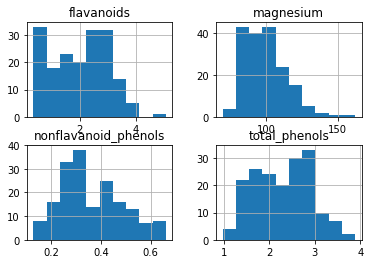

In [40]:
wine_df.iloc[:,4:8].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FC06400898>,
      dtype=object)

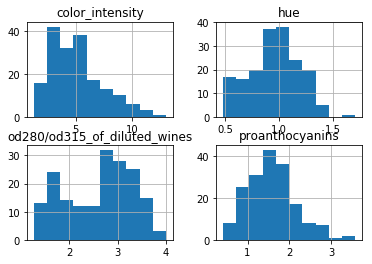

In [41]:
wine_df.iloc[:,8:12].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FC06558B70>]],
      dtype=object)

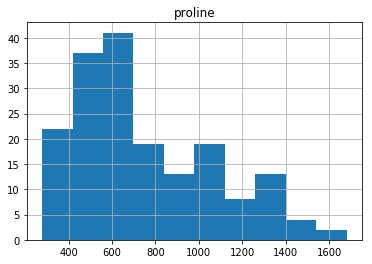

In [42]:
wine_df.iloc[:,12:].hist()

In [64]:
correlations = wine_df.iloc[:,0:3].corr()

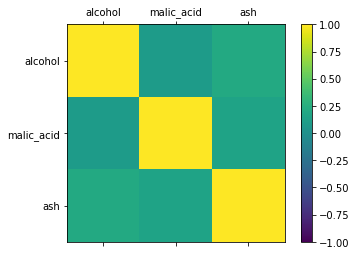

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(wine_df.iloc[:, 0:3].columns)
ax.set_yticklabels(wine_df.iloc[:, 0:3].columns)
plt.show()

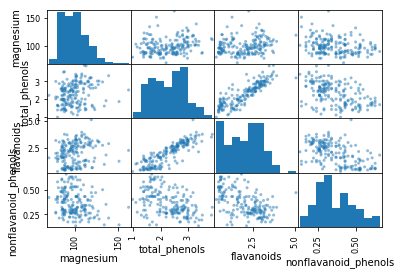

In [70]:
scatter_matrix(wine_df.iloc[:, 4:8])
plt.show()

we see correlation between flavanoids and total_phenols

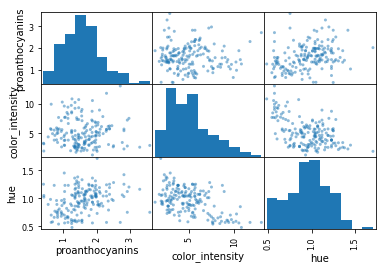

In [75]:
scatter_matrix(wine_df.iloc[:, 8:11])
plt.show()

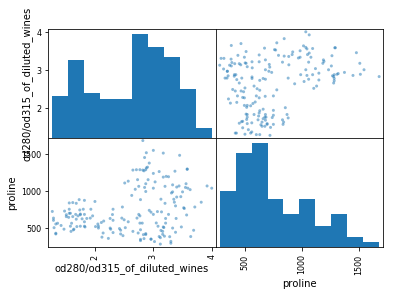

In [76]:
scatter_matrix(wine_df.iloc[:, 11:13])
plt.show()

# Step 3: Randomly split the data into train and test parts.

In [110]:
y = wine['target']

In [111]:
x = wine['data']

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20)

Randomly splitting data to test train with ratio 20-80%.

Scaling the data 

In [154]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Step 4:  Model Creation

Using the minimum parameters and converging the size of the neural net hidden layers to classify into three classes.

In [205]:
model = MLPClassifier(hidden_layer_sizes=(30,20,3),random_state = 4,solver = 'lbfgs')
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 20, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=4, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [212]:
predictions = model.predict(x_test)
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,predictions))

CONFUSION MATRIX
[[18  0  0]
 [ 0  9  0]
 [ 0  0  9]]


In [213]:
print("CLASSIFICATION REPORT")
print(classification_report(y_test,predictions))

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        18
          1       1.00      1.00      1.00         9
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        36



In [215]:
print("Accuracy")
accuracy_score(y_test, predictions)

Accuracy


1.0